# This is LSTM model

In [1]:
import numpy as np;
import matplotlib.pyplot as plt;
import pandas as pd;
from matplotlib.pyplot import figure
import keras;
import tensorflow as tf;
from keras.preprocessing.sequence import TimeseriesGenerator;
from keras.models import Sequential
from keras.layers import LSTM, Dense
import plotly.graph_objects as go
from sklearn.metrics import r2_score


In [2]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load the data into a pandas DataFrame
data_OG = pd.read_csv(r'C:\Users\emili\Downloads\Machine_Learning_SP_Course\Machine_Learning_Project\TSLA.csv')
data_OG = data_OG.drop(labels=range(0, len(data_OG.index)-127), axis=0)
data = data_OG[['Date','Close']]
data["Date"] = pd.to_datetime(data["Date"], format="%Y/%m/%d")
data.set_index("Date", inplace=True)

# Prepare the data for the LSTM model
window_size = 7
X = []
y = []
for i in range(window_size, len(data)):
    X.append(data.iloc[i-window_size:i, 0])
    y.append(data.iloc[i, 0])
X = np.array(X)
y = np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation="relu", return_sequences=True, input_shape=(window_size, 1)))
model.add(LSTM(50, activation="relu"))
model.add(Dense(1))
model.compile(optimizer="adam", loss="mse")

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=64, verbose=0)

# Evaluate the model on the testing set
mse = model.evaluate(X_test, y_test, verbose=0)
print("MSE: %.2f" % mse)

# Use the model to forecast future prices
forecast = []
last_window = X[-1]
while len(forecast) < 30:
    pred = model.predict(np.reshape(last_window, (1, window_size, 1)))
    forecast.append(pred[0][0])
    last_window = np.concatenate((last_window[1:], np.array([pred[0]])))

# Print the forecasted prices
print("Forecasted prices:")
for i, price in enumerate(forecast):
    date = pd.to_datetime(data.index[-1]) + pd.Timedelta(days=i+1)
    print("%s\t%.2f" % (date.strftime("%Y/%m/%d"), price))
    


C:\Users\emili\AppData\Local\Temp\ipykernel_11568\2287023488.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Date"] = pd.to_datetime(data["Date"], format="%Y/%m/%d")


MSE: 93.88
1/1 [==============================] - 0s 53ms/step
Forecasted prices:
2022/10/07	224.87
2022/10/08	236.90
2022/10/09	243.37
2022/10/10	253.09
2022/10/11	250.58
2022/10/12	249.78
2022/10/13	249.44
2022/10/14	253.84
2022/10/15	257.59
2022/10/16	260.90
2022/10/17	261.82
2022/10/18	263.04
2022/10/19	264.66
2022/10/20	267.25
2022/10/21	269.57
2022/10/22	271.57
2022/10/23	272.96
2022/10/24	274.37
2022/10/25	275.75
2022/10/26	277.21
2022/10/27	278.42
2022/10/28	279.41
2022/10/29	280.06
2022/10/30	280.50
2022/10/31	280.58
2022/11/01	280.31
2022/11/02	279.42
2022/11/03	277.82
2022/11/04	275.20
2022/11/05	271.72


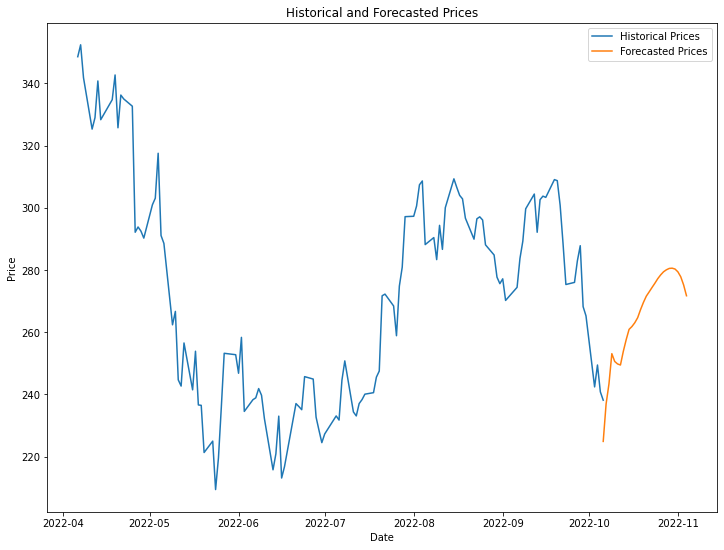

In [3]:
import matplotlib.pyplot as plt;
plt.figure(figsize = (12,9));
dates = pd.date_range(start=data.index[-1], periods=30, freq="D")
plt.plot(data.index, data["Close"], label="Historical Prices")
plt.plot(dates, forecast, label="Forecasted Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Historical and Forecasted Prices")
plt.legend()
plt.show()

## This is ARIMA the first one is with the adjusted parameters and smoothed data while the second one is just ARIMA with our regular data and regular parameters

C:\Users\emili\AppData\Local\Temp\ipykernel_11568\2146101409.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Date"] = pd.to_datetime(data["Date"], format="%Y/%m/%d")
C:\Users\emili\AppData\Local\Temp\ipykernel_11568\2146101409.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Close"] = pd.Series(data['Close']).rolling(window=5).mean()
C:\Users\emili\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated fr

ARIMA(0, 0, 0) failed to converge


C:\Users\emili\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\emili\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\emili\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\emili\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\U

ARIMA(0, 0, 1) failed to converge


C:\Users\emili\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\emili\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\emili\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\emili\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\U

ARIMA(0, 0, 2) failed to converge
ARIMA(0, 1, 0) failed to converge
ARIMA(0, 1, 1) failed to converge
ARIMA(0, 1, 2) failed to converge
ARIMA(1, 0, 0) failed to converge


C:\Users\emili\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\emili\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\emili\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\emili\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\U

ARIMA(1, 0, 1) failed to converge


C:\Users\emili\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\emili\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\emili\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\emili\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\U

ARIMA(1, 0, 2) failed to converge
ARIMA(1, 1, 0) failed to converge
ARIMA(1, 1, 1) failed to converge


C:\Users\emili\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\emili\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\emili\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\emili\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\U

ARIMA(1, 1, 2) failed to converge
ARIMA(2, 0, 0) failed to converge


C:\Users\emili\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\emili\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\emili\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\emili\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\U

ARIMA(2, 0, 1) failed to converge


C:\Users\emili\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\emili\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\emili\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\emili\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\U

ARIMA(2, 0, 2) failed to converge
ARIMA(2, 1, 0) failed to converge


C:\Users\emili\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\emili\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\emili\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\emili\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 1, 1) failed to converge


C:\Users\emili\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\emili\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\emili\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\emili\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\U

ARIMA(2, 1, 2) failed to converge


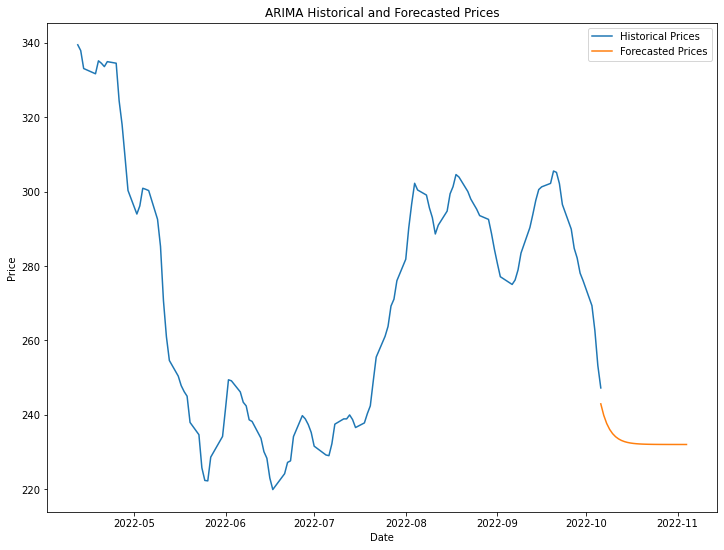

In [4]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from itertools import product

# load the data into a pandas DataFrame
data_OG = pd.read_csv(r'C:\Users\emili\Downloads\Machine_Learning_SP_Course\Machine_Learning_Project\TSLA.csv')
data_OG = data_OG.drop(labels=range(0, len(data_OG.index)-127), axis=0)
data = data_OG[['Date','Close']]
data["Date"] = pd.to_datetime(data["Date"], format="%Y/%m/%d")
data["Close"] = pd.Series(data['Close']).rolling(window=5).mean()
data.set_index("Date", inplace=True)

# split the data into a training and validation set

# split the data into a training and validation set
train_size = int(len(data) * 0.8)
train, valid = data[:train_size], data[train_size:]

# try different values of p, d, and q until a valid model is found
for p in range(3):
    for d in range(2):
        for q in range(3):
            try:
                # fit an ARIMA model with the current values of p, d, and q
                model = ARIMA(train, order=(p, d, q))
                model_fit = model.fit()
                # generate a forecast using the validation set
                forecast = model_fit.forecast(steps=len(valid))[0]
                # evaluate the forecast using mean squared error
                score = mean_squared_error(valid, forecast)
                print(f"ARIMA({p}, {d}, {q}) MSE = {score:.2f}")
            except:
                # if the model fails to converge, print an error message
                print(f"ARIMA({p}, {d}, {q}) failed to converge")

# fit the best model on the full dataset and generate a forecast
model = ARIMA(data, order=(1, 1, 1))
model_fit = model.fit()
forecast = model_fit.forecast(steps=30)

# plot the original data and the forecast
plt.figure(figsize = (12,9));
dates = pd.date_range(start=data.index[-1], periods=30, freq="D")
plt.plot(data.index, data["Close"], label="Historical Prices")
plt.plot(dates, forecast, label="Forecasted Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("ARIMA Historical and Forecasted Prices")
plt.legend()
plt.show()

C:\Users\emili\AppData\Local\Temp\ipykernel_11568\1267049052.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Date"] = pd.to_datetime(data["Date"], format="%Y/%m/%d")
C:\Users\emili\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\emili\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\emili\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model

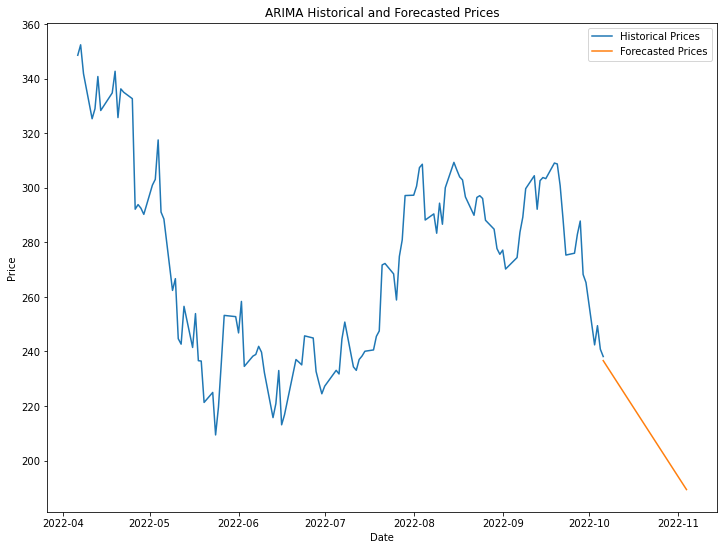

In [5]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot as plt

# fit an ARIMA model to the data
data_OG = pd.read_csv(r'C:\Users\emili\Downloads\Machine_Learning_SP_Course\Machine_Learning_Project\TSLA.csv')
data_OG = data_OG.drop(labels=range(0, len(data_OG.index)-127), axis=0)
data = data_OG[['Date','Close']]
data["Date"] = pd.to_datetime(data["Date"], format="%Y/%m/%d")
data.set_index("Date", inplace=True)

model = ARIMA(data, order=(1, 2, 1))
model_fit = model.fit()

# generate forecasts for the next 30 days
forecast = model_fit.forecast(steps=30)

# plot the original data and the forecast
plt.figure(figsize = (12,9));
plt.plot(data.index, data["Close"], label="Historical Prices")
plt.plot(dates, forecast, label="Forecasted Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("ARIMA Historical and Forecasted Prices")
plt.legend()
plt.show()

### This is with Random Forest Regression

C:\Users\emili\AppData\Local\Temp\ipykernel_11568\1550576865.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Date"] = pd.to_datetime(data["Date"], format="%Y/%m/%d")


[236.12290885 235.01295502 233.89875276 232.07395134 224.43696292
 225.5361352  228.64250033 229.69610655 231.73735817 236.83346039
 242.44109597 242.95801876 241.4202391  242.20869526 242.08352106
 243.77036778 244.01104164 245.3694249  245.92258178 249.97062527
 250.17080065 249.75190247 249.86170157 249.3603929  249.58171268
 249.49896523 249.33831531 249.31042585 249.57245711 249.60034657]


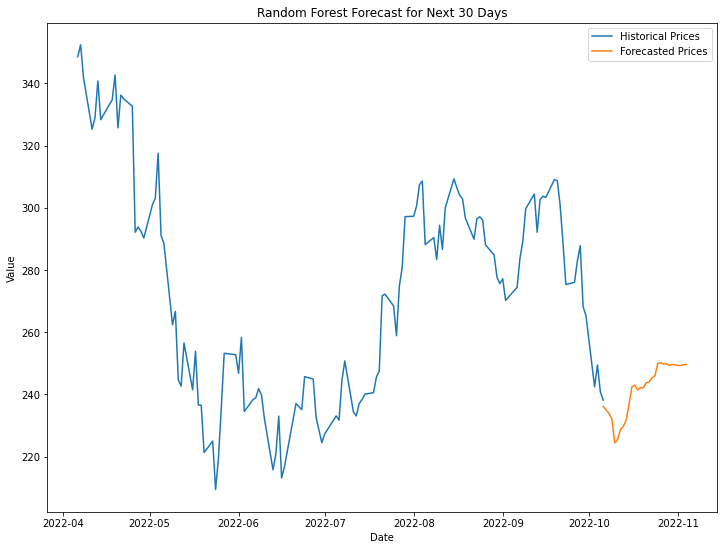

In [6]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor

# load the data
data_OG = pd.read_csv(r'C:\Users\emili\Downloads\Machine_Learning_SP_Course\Machine_Learning_Project\TSLA.csv')
data_OG = data_OG.drop(labels=range(0, len(data_OG.index)-127), axis=0)
data = data_OG[['Date','Close']]
data["Date"] = pd.to_datetime(data["Date"], format="%Y/%m/%d")
data1 = data
df = data

# extract the date and target columns
dates = df['Date'].values
target = df['Close'].values

# define the number of days to forecast
n_forecast = 30

# create a lagged dataset for regression
lags = 7
X = np.zeros((len(target)-lags, lags))
y = np.zeros((len(target)-lags, ))
for i in range(lags, len(target)):
    X[i-lags, :] = target[i-lags:i]
    y[i-lags] = target[i]

# split the dataset into training and testing sets
n_train = int(0.8*len(X))
X_train, y_train = X[:n_train], y[:n_train]
X_test, y_test = X[n_train:], y[n_train:]

# create and fit the random forest regressor
rf = RandomForestRegressor(n_estimators=1000, max_depth=5, random_state=42)
rf.fit(X_train, y_train)

# make predictions for the next n_forecast days
forecast = np.zeros((n_forecast, ))
for i in range(n_forecast):
    last_week = target[-lags:]
    pred = rf.predict(last_week.reshape(1, -1))[0]
    target = np.append(target, pred)
    forecast[i] = pred

# print the forecast
print(forecast)

# Plot the actual data
plt.figure(figsize = (12,9));
data1.set_index("Date", inplace=True)
plt.plot(data.index, data["Close"], label="Historical Prices")

# Plot the forecast
dates = pd.date_range(start=data1.index[-1], periods=30, freq="D")
plt.plot(dates, forecast, label="Forecasted Prices")

# Set the x-axis label
plt.xlabel('Date')

# Set the y-axis label
plt.ylabel('Value')

# Set the title
plt.title('Random Forest Forecast for Next 30 Days')

# Add a legend
plt.legend()

# Display the plot
plt.show()

#### Cant get he Gradient Boosting Regressor to work because of problems with Pandas

In [7]:
from sklearn.ensemble import GradientBoostingRegressor
import pandas as pd

# load the data
data_OG = pd.read_csv(r'C:\Users\emili\Downloads\Machine_Learning_SP_Course\Machine_Learning_Project\TSLA.csv')
data_OG = data_OG.drop(labels=range(0, len(data_OG.index)-127), axis=0)
data = data_OG[['Date','Close']]
data["Date"] = pd.to_datetime(data["Date"], format="%Y/%m/%d")
data.set_index("Date", inplace=True)
df = data.resample('D').ffill()

# create the training and testing datasets
train1 = df[:-30]
train = df[:-30].values
#train = train.reset_index(drop=True)
test = df[-30:]

# split the data into features (X) and target (y)
X_train, y_train = train1.drop('Close', axis=1), train
X_test, y_test = test.drop('Close', axis=1), test['Close']

# create the Gradient Boosting model and fit the training data
model = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, max_depth=1, random_state=42)
model.fit(X_train, y_train)

# make predictions on the testing data
y_pred = model.predict(X_test)

# calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


C:\Users\emili\AppData\Local\Temp\ipykernel_11568\2355437901.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Date"] = pd.to_datetime(data["Date"], format="%Y/%m/%d")


ValueError: at least one array or dtype is required

In [ ]:
def pred(df):
    close_data = df['Close'].values
    close_data = close_data.reshape((-1,1));

    split_percent = 0.80;
    split = int(split_percent*len(close_data));

    close_train = close_data[:split];
    close_test = close_data[split:];

    date_train = df.index[:split];
    date_test = df.index[split:];

    #print(len(close_train));
    #print(len(close_test));
    ## You should get that the train and testing sets have been split 
    ## into 80% train and 20% test

    look_back = 5;

    train_generator = TimeseriesGenerator(close_train, close_train, length = look_back, batch_size = 200);
    test_generator = TimeseriesGenerator(close_test, close_test, length = look_back, batch_size = 200);

    model = Sequential()
    model.add(
        LSTM(30,
            activation='LeakyReLU',
            input_shape=(look_back,1))
    )
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')

    num_epochs = 100;
    model.fit(train_generator, epochs=num_epochs, verbose=1)
    prediction = model.predict(test_generator)

    close_train = close_train.reshape((-1))
    close_test = close_test.reshape((-1))
    prediction = prediction.reshape((-1))

    close_data = close_data.reshape((-1));

    def predict(num_prediction, model):
        prediction_list = close_data[-look_back:];
    
        for _ in range(num_prediction):
            x = prediction_list[-look_back:];
            x = x.reshape((1, look_back, 1));
            out = model.predict(x)[0][0];
            prediction_list = np.append(prediction_list, out);
        prediction_list = prediction_list[look_back-1:];
        
        return prediction_list;
    
    def predict_dates(num_prediction):
        last_date = df.index.values[-1];
        prediction_dates = pd.date_range(last_date, periods=num_prediction+1).tolist();
        return prediction_dates;

    num_prediction = 5;
    forecast = predict(num_prediction, model);
    forecast_dates = predict_dates(num_prediction);
    trace3 = go.Scatter(
        x = date_test,
        y = close_test,
        mode='lines',
        name = 'Historical Prices'
    )
    layout = go.Layout(
        title = ("Stock's Historical and Forecasted Prices"),
        font = dict(size = 20),
        width=500,
        height=500,
        xaxis = {'title' : "Date"},
        yaxis = {'title' : "Close"}
    )
    #test_r2_score = r2_score(close_test[0:len(close_test)-look_back],prediction)
    #print("The R2_score of this Training-Testing model is:",test_r2_score)
    trace1 = go.Scatter(
        x = forecast_dates,
        y = forecast,
        mode = 'lines',
        name = 'Forecasted Prices'
    )
    layout = go.Layout(
        title = ("Stock"),
        font = dict(size = 20),
        xaxis = {'title' : "Date"},
        yaxis = {'title' : "Prices"}
    )
    fig = go.Figure(data=[trace3, trace1], layout=layout);
    fig.show()
    #df_r2_score = r2_score(df_comp['Close'], forecast)
    #print("The R2_score of this prediction model is:",df_r2_score)

In [ ]:
pred(data)

##### This is using Support Vector Machines

In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# load data
data_OG = pd.read_csv(r'C:\Users\emili\Downloads\Machine_Learning_SP_Course\Machine_Learning_Project\TSLA.csv')
data_OG = data_OG.drop(labels=range(0, len(data_OG.index)-127), axis=0)
data = data_OG[['Date','Close']]
data["Date"] = pd.to_datetime(data["Date"], format="%Y/%m/%d")
data.set_index("Date", inplace=True)
data1 = data
df = data

# create a numpy array for dates and close prices
dates = np.array(df.index).reshape(-1, 1)
close_prices = np.array(df['Close'])

# split data into training and testing sets
split = int(len(df) * 0.8)
train_dates = dates[:split]
train_prices = close_prices[:split]
test_dates = dates[split:]
test_prices = close_prices[split:]

# create and fit SVR model
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_rbf.fit(train_dates, train_prices)

# make predictions for the test set
predictions = svr_rbf.predict(test_dates)

plt.figure(figsize = (12,9))
# plot the actual prices and predicted prices
plt.plot(test_dates, test_prices, label='Actual')
plt.plot(test_dates, predictions, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('SVR Prediction')
plt.legend()
plt.show()

# # forecast the next 30 days
# last_date = dates[-1]
# forecast_dates = pd.date_range(last_date, periods=30).values.reshape(-1, 1)
# forecast_prices = svr_rbf.predict(forecast_dates)

# # plot the forecasted prices
# plt.plot(forecast_dates, forecast_prices, label='Forecasted')
# plt.xlabel('Date')
# plt.ylabel('Close Price')
# plt.title('SVR Forecast')
# plt.legend()
# plt.show()


#### This is using SARIMAX

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Load data
data_OG = pd.read_csv(r'C:\Users\emili\Downloads\Machine_Learning_SP_Course\Machine_Learning_Project\TSLA.csv')
data_OG = data_OG.drop(labels=range(0, len(data_OG.index)-127), axis=0)
data = data_OG[['Date','Close']]
data["Date"] = pd.to_datetime(data["Date"], format="%Y/%m/%d")
data.set_index("Date", inplace=True)
data1 = data
df = data

# Convert Date column to datetime format
#df['Date'] = pd.to_datetime(df['Date'])

# Set Date column as index
#df.set_index('Date', inplace=True)
model = SARIMAX(data['Close'], order=(1, 0, 0), seasonal_order=(1, 1, 0, 12))
results = model.fit()

# make predictions for the next 30 days
forecast = results.predict(start=len(data), end=len(data)+29)

# create a datetime index for the forecast period
forecast_dates = pd.date_range(start=data.index[-1], periods=30+1, freq='D')[1:]

# combine the original data and the forecast data
combined = pd.concat([data, pd.DataFrame({'Close': forecast}, index=forecast_dates)])

# plot the results
fig, ax = plt.subplots(figsize=(12,9))
ax.plot(combined.index, combined['Close'], label='Actual')
ax.plot(forecast_dates, forecast, label='Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('Close Price')
ax.set_title('SARIMAX Stock Price Forecast')
ax.legend()
plt.show()


#### Simple exponential Smoothing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import SimpleExpSmoothing

# Load dat
data = pd.read_csv(r'C:\Users\emili\Downloads\Machine_Learning_SP_Course\Machine_Learning_Project\TSLA.csv')
data = data.drop(labels=range(0, len(data.index)-127), axis=0)
data["Date"] = pd.to_datetime(data["Date"], format="%Y/%m/%d")
#data = data.set_index("Date", inplace=True)
df = data
#df.set_index('Date', inplace=True)

# Create a SimpleExpSmoothing model
model = SimpleExpSmoothing(df['Close'])

# Fit the model
fit = model.fit()

# Forecast the next 30 days
forecast = fit.forecast(30)

# Plot the original data and the forecasted data
plt.figure(figsize=(12,9))
plt.plot(df.index, df['Close'], label='Original Data')
plt.plot(forecast.index, forecast.values, label='Forecasted Data')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title("SES Historical and Forecasted")
plt.legend()
plt.show()


#### Holt Winter's Exponential Smoothing 

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.api import ExponentialSmoothing
import matplotlib.pyplot as plt

# Read in the data
data = pd.read_csv(r'C:\Users\emili\Downloads\Machine_Learning_SP_Course\Machine_Learning_Project\TSLA.csv', parse_dates=True)
df = data.drop(labels=range(0, len(data.index)-127), axis=0)

model = ExponentialSmoothing(df["Close"], seasonal="add", seasonal_periods=12)

# fit the model
model_fit = model.fit()

# make predictions for the next 30 days
forecast = model_fit.forecast(29)

# add the forecast to the dataframe
last_date = df["Date"].iloc[-1]
date_range = pd.date_range(last_date, periods=30, freq="D")[1:]
forecast_df = pd.DataFrame({"Date": date_range, "Close": forecast})

df = pd.concat([df, forecast_df], ignore_index=True)
df["Date"] = pd.to_datetime(df["Date"], format="%Y/%m/%d")

# plot the results
fig, ax = plt.subplots(figsize=(12, 9))
ax.plot(df["Date"], df["Close"], label="Actual")
ax.plot(forecast_df["Date"], forecast_df["Close"], label="Forecast")
ax.set_title("Holt Winter's Exponential Smoothing Forecast")
ax.set_xlabel("Date")
ax.set_ylabel("Close Price")
ax.legend()
plt.show()

# Actual 30 day aheads

In [ ]:
df_TSLA_comp = pd.read_csv(r'C:\Users\emili\Downloads\Machine_Learning_SP_Course\Machine_Learning_Project\TSLA_comp.csv')#, index_col = 'Date')
df_TSLA_comp["Date"] = pd.to_datetime(df_TSLA_comp["Date"], format="%m/%d/%Y")
df_TSLA_comp.set_index("Date", inplace=True)
plt.figure(figsize = (12, 9))
plt.plot(df.index, df['Close']);
plt.plot(df_TSLA_comp.index,df_TSLA_comp['Close']);
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual TSLA stock prices 30 days')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

# Load and prepare the data
data = pd.read_csv(r'C:\Users\emili\Downloads\Machine_Learning_SP_Course\Machine_Learning_Project\TSLA.csv')
data = data.sort_values('Date')
data = data.drop(['Open', 'High', 'Low', 'Volume','Adj Close'], axis=1)

# Normalize the data
scaler = MinMaxScaler()
data['Close'] = scaler.fit_transform(data['Close'].values.reshape(-1,1))

# Define the train and test data sets
train_data = data.iloc[:-30,:]
test_data = data.iloc[-30:,:]

# Create the training and testing sets
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X.iloc[i:(i + time_steps)].values)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 10

X_train, y_train = create_dataset(train_data, train_data.Close, time_steps)
X_test, y_test = create_dataset(test_data, test_data.Close, time_steps)

# Build the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Transformer(input_shape=(time_steps, 1)),
  tf.keras.layers.Dense(units=1)
])

model.compile(optimizer='adam', loss='mae')

# Train the model
history = model.fit(
    X_train, y_train, 
    epochs=100, 
    batch_size=32, 
    validation_split=0.1,
    shuffle=False
)

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Make predictions
predictions = []
current_batch = X_test[0,:,:].reshape(1, time_steps, 1)

for i in range(len(X_test)):
    predicted = model.predict(current_batch)[0]
    predictions.append(predicted)
    current_batch = np.append(current_batch[:,1:,:],[[predicted]],axis=1)

# Plot the predicted values and the actual values
plt.plot(y_test, label='Actual Close')
plt.plot(predictions, label='Predicted Close')
plt.legend()
plt.show()

# Rescale the predicted values
predicted_prices = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))


In [11]:
import pandas as pd
import numpy as np
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import MinMaxScaler
# Load the data
df = pd.read_csv(r'C:\Users\emili\Downloads\Machine_Learning_SP_Course\Machine_Learning_Project\TSLA.csv')

# Preprocess the data
scaler = MinMaxScaler()
df["Close"] = scaler.fit_transform(df[["Close"]])
df["Date"] = pd.to_datetime(df["Date"])
df["Day"] = df["Date"].dt.dayofyear
df = df[["Day", "Close"]].values.astype(np.float32)

# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
train_data = df[:train_size]
test_data = df[train_size:]
class StockDataset(Dataset):
    def __init__(self, data):
        self.data = data[:-1]  # Ignore the last row
        self.target = data[1:]  # Ignore the first row

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        x = self.data[index]
        y = self.target[index]
        return x, y

batch_size = 32
train_dataset = StockDataset(train_data)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
class TransformerModel(nn.Module):
    def __init__(self, input_size, output_size, d_model, nhead, num_layers):
        super().__init__()
        self.encoder = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead),
            num_layers=num_layers
        )
        self.decoder = nn.Linear(d_model, output_size)

    def forward(self, x):
        x = x.transpose(0, 1)  # (seq_len, batch_size, input_size)
        x = self.encoder(x)
        x = x[-1, :, :]  # Only use the last hidden state
        x = self.decoder(x)
        return x

input_size = 1
output_size = 1
d_model = 128
nhead = 8
num_layers = 6
model = TransformerModel(input_size, output_size, d_model, nhead, num_layers)
learning_rate = 0.001
num_epochs = 100

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    for x, y in train_loader:
        optimizer.zero_grad()
        y_pred = model(x.unsqueeze(-1))
        loss = criterion(y_pred.squeeze(), y)
        loss.backward()
        optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")
# Use the last 30 days of training data as input for forecasting
x_input = train_data[-30:, 1]
for i in range(30):
    x = torch.from_numpy(x_input).float().unsqueeze(0).unsqueeze(-1)
    y_pred = model(x)


AssertionError: was expecting embedding dimension of 128, but got 1

In [ ]:
pip install torch

In [ ]:
pip install transformer_model

In [ ]:
pip install TransformerModel

In [9]:
pip install transformers